In [1]:
# need this to run
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import tree
from sklearn.metrics import accuracy_score

# Figures inline and set visualization style
%matplotlib inline
sns.set()

In [2]:
# makes the datasets usable
train = pd.read_csv("/Users/romar/Documents/Datasets/train.csv")
test    = pd.read_csv("/Users/romar/Documents/Datasets/test.csv")

In [3]:
# allows to see the categories of the datasets
print(train.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB
None


In [4]:
# allows to see stats on the data as well as seing which category is missing data
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


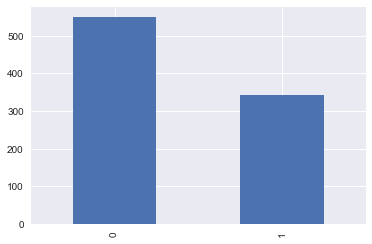

In [5]:
# bar graph on survivors
train.Survived.value_counts().plot(kind = 'bar')

In [6]:
# testing with no survivors
test['Survived'] = 0
test[['PassengerId', 'Survived']].to_csv("/Users/romar/Documents/Datasets/nosurv.csv", index=False)

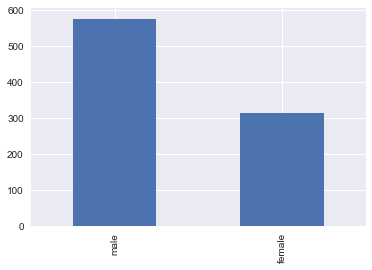

In [7]:
train.Sex.value_counts().plot(kind = 'bar')

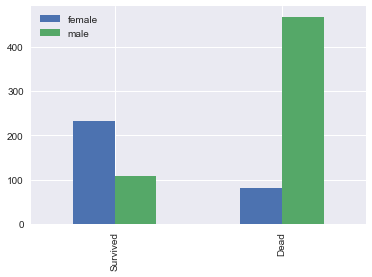

In [9]:
# graph to see if who survived between male and female
a = train[train.Survived == 1].Sex.value_counts()
b = train[train.Survived == 0].Sex.value_counts()
df = pd.DataFrame([a,b])
df.index = ['Survived', 'Dead']
df.plot(kind = 'bar')

In [11]:
# survivers 
train.groupby(['Sex']).Survived.sum()

Sex
female    233
male      109
Name: Survived, dtype: int64

In [12]:
test['Survived'] = test.Sex == 'female'
test['Survived'] = test.Survived.apply(lambda x: int (x))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,1
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [14]:
test[['PassengerId', 'Survived']].to_csv("/Users/romar/Documents/Datasets/Survived.csv", index=False)

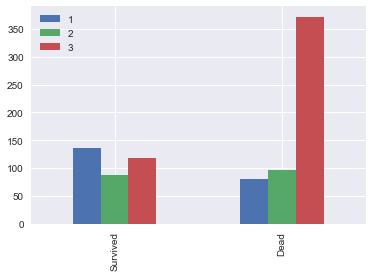

In [15]:
# checks to see who survived between Pclass 
a = train[train.Survived == 1].Pclass.value_counts()
b = train[train.Survived == 0].Pclass.value_counts()
df = pd.DataFrame([a,b])
df.index = ['Survived', 'Dead']
df.plot(kind = 'bar')

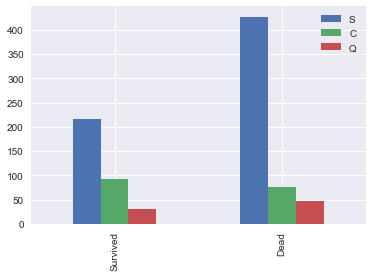

In [16]:
# who survived between embarked
a = train[train.Survived == 1].Embarked.value_counts()
b = train[train.Survived == 0].Embarked.value_counts()
df = pd.DataFrame([a,b])
df.index = ['Survived', 'Dead']
df.plot(kind = 'bar')

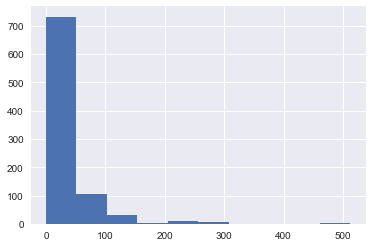

In [17]:
train.Fare.hist()

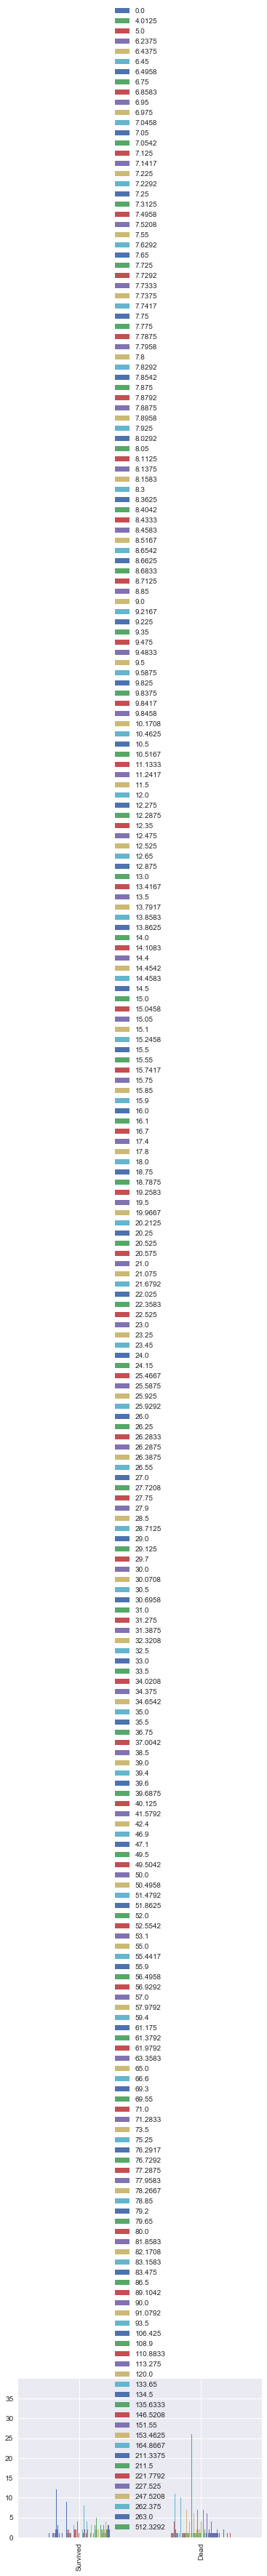

In [18]:
# survived between fare
a = train[train.Survived == 1].Fare.value_counts()
b = train[train.Survived == 0].Fare.value_counts()
df = pd.DataFrame([a,b])
df.index = ['Survived', 'Dead']
df.plot(kind = 'bar')

In [19]:
# filled in the missing ages with the mean of all 
averageAge = train.Age.mean()

In [21]:
train.Age = train.Age.fillna(value = averageAge)

In [22]:
train[train.Age.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


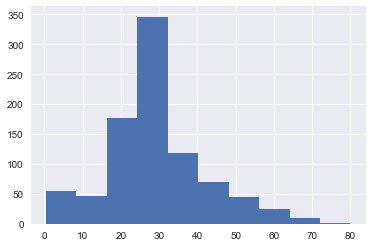

In [23]:
train.Age.hist()

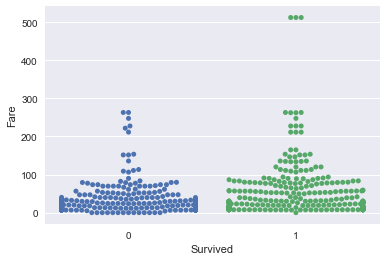

In [25]:
# plot between survived and fare
sns.swarmplot(x= "Survived", y = "Fare", data = train)

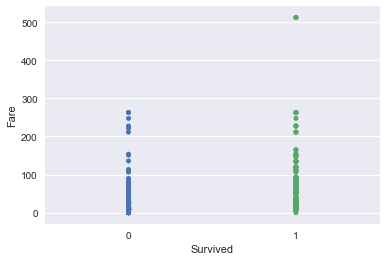

In [26]:
sns.stripplot(x = "Survived", y = "Fare", data = train)

In [27]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


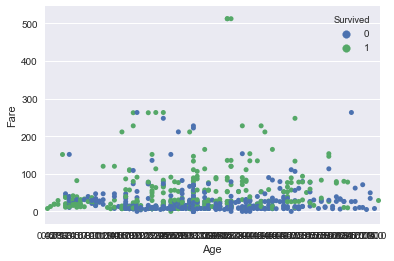

In [32]:
sns.stripplot(x = "Age", y = "Fare", hue = "Survived", data = train)

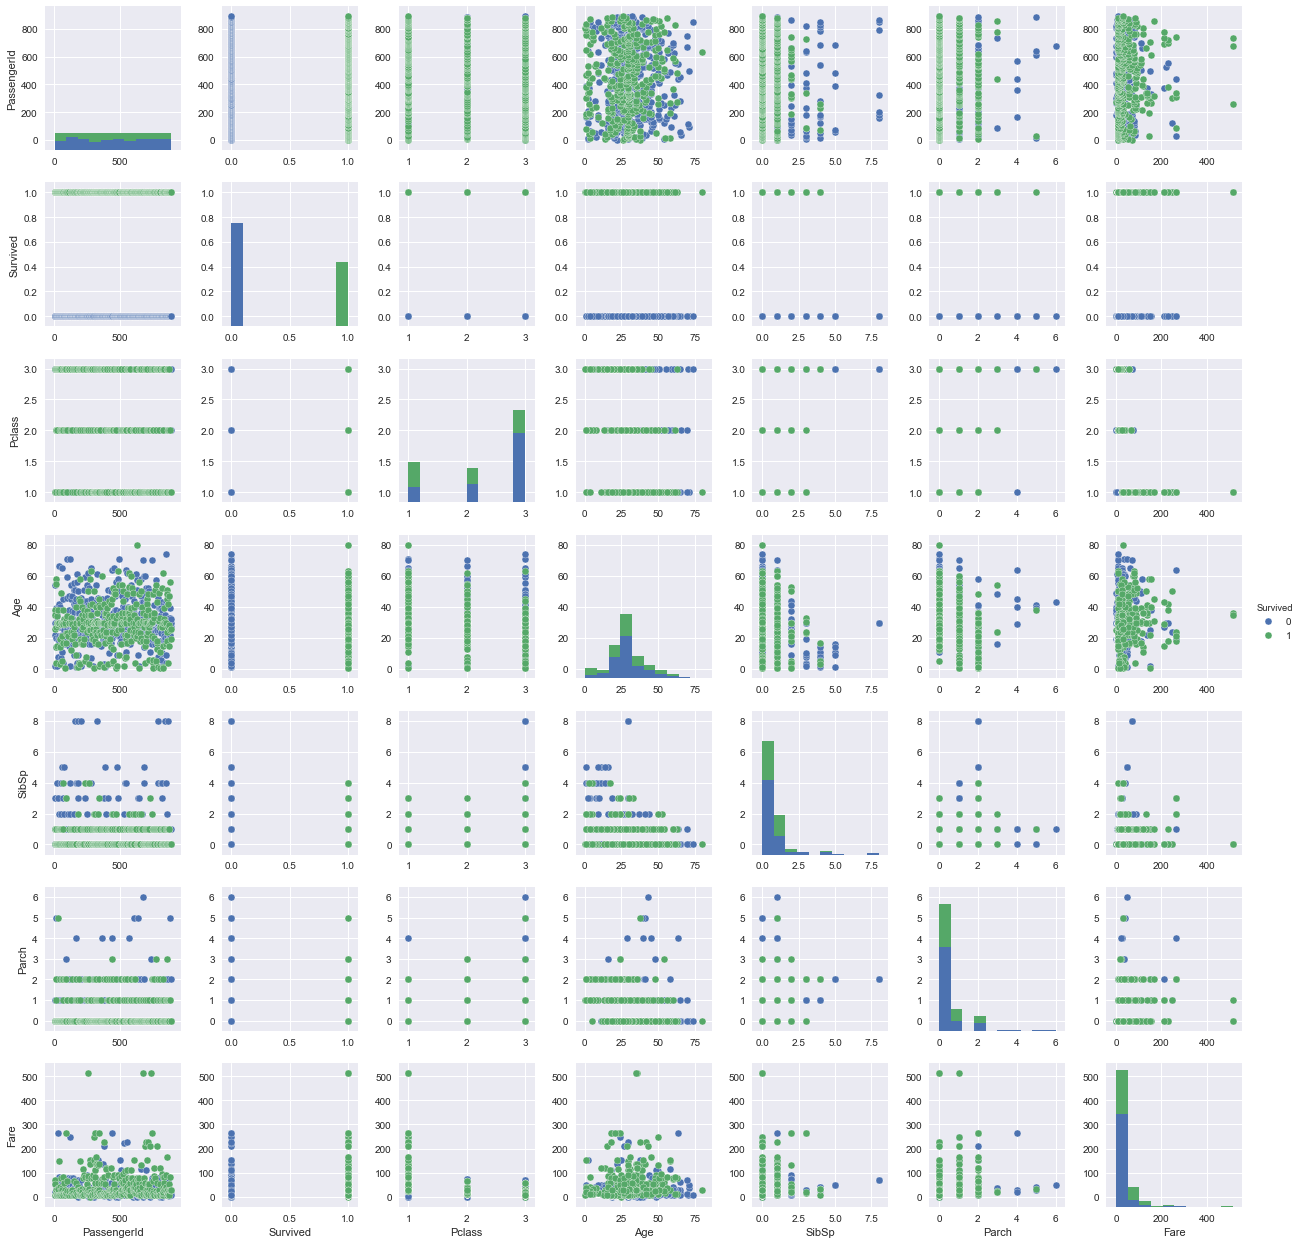

In [33]:
sns.pairplot(train, hue = "Survived" )

In [89]:
test['Survived'] = test.Age < 30
test['Survived'] = test.Survived.apply(lambda x: int (x))
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Survived
0,3,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0
1,3,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0
2,2,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0
3,3,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,1
4,3,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,1


In [95]:
test[['PassengerId' ,'Survived']].to_csv("/Users/romar/Documents/Datasets/trying.csv", index=False)
print (test[['PassengerId', 'Survived']].head())

   PassengerId  Survived
0            3         0
1            3         0
2            2         0
3            3         1
4            3         1
